In [1]:
    m1  = 1.0              
    m2  = 1.0
    l1  = 10.0             
    l2  = 10.0
    g   = 9.81              
    dt  = 0.01            
    M   = m2 / (m1+m2) 
    l   = l1/l2    
    dx  = dt/5
    R   = 1                    #radius of bob
    r   = 0.1
    pi  = 3.141592653589793238

In [2]:
from math import * 
from numpy import *
from pandas import *

In [3]:
def alpha1(ang_1, ang_2):
    return (1/l)*M*cos(ang_1-ang_2)
def alpha2(ang_1, ang_2):
    return l*cos(ang_1-ang_2)
def f1(ang_1, ang_2, w1, w2):
    return (-1/l)*M*(w2**2)*sin(ang_1-ang_2)-(g/l1)*sin(ang_1)
def f2(ang_1, ang_2, w1, w2):
    return l*(w1**2)*sin(ang_1-ang_2)-(g/l2)*sin(ang_2)

def g1(ang_1, ang_2, w1, w2):
    return w1      
def g2(ang_1, ang_2, w1, w2):
    return w2   
def g3(ang_1, ang_2, w1, w2):
    return (f1(ang_1, ang_2, w1, w2)-alpha1(ang_1, ang_2)*f2(ang_1, ang_2, w1, w2))/(1-alpha1(ang_1, ang_2)*alpha2(ang_1, ang_2))
def g4(ang_1, ang_2, w1, w2):
    return (f2(ang_1, ang_2, w1, w2)-f1(ang_1, ang_2, w1, w2)*alpha2(ang_1, ang_2))/(1-alpha1(ang_1, ang_2)*alpha2(ang_1, ang_2))
   

In [4]:
    # Initial Value
    x1 = pi/2         # theta1
    x2 = pi/2         # theta2
    x3 = 0.0              # w1i
    x4 = 0.0              # w2i
    t  = 0.0              # time
    y1 = [x1]
    y2 = [x2]
    y3 = [x3]
    y4 = [x4]

In [5]:
for x in range(1,1000):
    # Calculate using Runge-Kutta 4th
        t = t + dt
        k11 = g1(x1, x2, x3, x4)
        k12 = g2(x1, x2, x3, x4)
        k13 = g3(x1, x2, x3, x4)
        k14 = g4(x1, x2, x3, x4)
        k21 = g1(x1+dt/2*k11, x2+dt/2*k12, x3+dt/2*k13, x4+dt/2*k14 )
        k22 = g2(x1+dt/2*k11, x2+dt/2*k12, x3+dt/2*k13, x4+dt/2*k14 )
        k23 = g3(x1+dt/2*k11, x2+dt/2*k12, x3+dt/2*k13, x4+dt/2*k14 )
        k24 = g4(x1+dt/2*k11, x2+dt/2*k12, x3+dt/2*k13, x4+dt/2*k14 )
        k31 = g1(x1+dt/2*k21, x2+dt/2*k22, x3+dt/2*k23, x4+dt/2*k24 )
        k32 = g2(x1+dt/2*k21, x2+dt/2*k22, x3+dt/2*k23, x4+dt/2*k24 )
        k33 = g3(x1+dt/2*k21, x2+dt/2*k22, x3+dt/2*k23, x4+dt/2*k24 )
        k34 = g4(x1+dt/2*k21, x2+dt/2*k22, x3+dt/2*k23, x4+dt/2*k24 )
        k41 = g1(x1+dt*k31,  x2+dt*k32,  x3+dt*k33,  x4+dt*k34 )
        k42 = g2(x1+dt*k31,  x2+dt*k32,  x3+dt*k33,  x4+dt*k34 )
        k43 = g3(x1+dt*k31,  x2+dt*k32,  x3+dt*k33,  x4+dt*k34 )
        k44 = g4(x1+dt*k31,  x2+dt*k32,  x3+dt*k33,  x4+dt*k34 )
        
        # Update angle and angular velocity
        x1 = x1 + dx * (k11 + 2*k21 + 2*k31 + k41)
        y1.append(x1)
        x2 = x2 + dx * (k12 + 2*k22 + 2*k32 + k42)
        y2.append(x2)
        x3 = x3 + dx * (k13 + 2*k23 + 2*k33 + k43)
        y3.append(x3)
        x4 = x4 + dx * (k14 + 2*k24 + 2*k34 + k44)
        y4.append(x4)

<ipython-input-3-48b89eae4f21>:6: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  return (-1/l)*M*(w2**2)*sin(ang_1-ang_2)-(g/l1)*sin(ang_1)
<ipython-input-3-48b89eae4f21>:2: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  return (1/l)*M*cos(ang_1-ang_2)
<ipython-input-3-48b89eae4f21>:8: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  return l*(w1**2)*sin(ang_1-ang_2)-(g/l2)*sin(ang_2)
<ipython-input-3-48b89eae4f21>:4: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  return l*cos(ang_1-ang_2)


In [6]:
zip(y1,y2)

In [7]:
import csv
with open('dp_ang_just.csv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(y1,y2))
quit()    

In [8]:
import pandas as pd
a = pd.Series(y1)
p1x = l1*sin(a)
b = pd.Series(y2)
p1y = -l1*cos(a)
p2x = l1*sin(a)+l2*sin(b)
p2y = -(l1*cos(a)+l2*cos(b))

<ipython-input-8-d81b2bb493d3>:3: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  p1x = l1*sin(a)
<ipython-input-8-d81b2bb493d3>:5: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  p1y = -l1*cos(a)
<ipython-input-8-d81b2bb493d3>:6: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  p2x = l1*sin(a)+l2*sin(b)
<ipython-input-8-d81b2bb493d3>:7: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  p2y = -(l1*cos(a)+l2*cos(b))


In [9]:
zip(p1x,p1y,p2x,p2y)

In [10]:
import csv
with open('dp_pos.csv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(p1x,p1y,p2x,p2y))
quit()

0 / 300


FileNotFoundError: [Errno 2] No such file or directory: 'frames/_img0000.png'

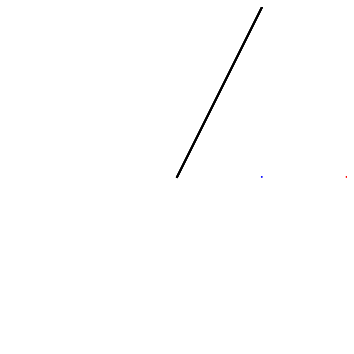